In [64]:
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
from sklearn.metrics import precision_score, recall_score
from sklearn import metrics

import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sn

In [65]:
# Load MNIST dataset, X is the images array, Y the labels array
X, Y = fetch_openml('mnist_784', return_X_y = True, as_frame = False) 

In [66]:
# Keep 21000 data for the training
training_data = X[:21000]
training_target = Y[:21000]

# Other data are used for the test
test_data = X[21000:30000]
test_target = Y[21000:30000]

In [67]:
precomputed_data = np.dot(training_data, training_data.T)
precomputed_data_2 = np.dot(test_data, training_data.T)

In [84]:
clf_type = ['poly', 'rbf', 'sigmoid', 'linear', 'precomputed']
C_value = np.linspace(.1, 1, 5)
time_list, accuracy_list, recall_list, matrix_list = [], [], [], []

for clf in clf_type:
    start = time.time()
    Y_accuracy = []
    Y_recall = []
    Y_matrix = []     

    for C in C_value:
        
        clsvm = SVC(C = C, kernel=clf)
        if clf == 'precomputed':
            Classifier = clsvm.fit(precomputed_data, training_target)
            prediction = Classifier.predict(precomputed_data_2)
        else:
            Classifier = clsvm.fit(training_data, training_target)
            prediction = Classifier.predict(test_data)

        accuracy = precision_score(test_target, prediction, average="micro")
        recall = recall_score(test_target, prediction, average='macro')
        matrix = metrics.confusion_matrix(test_target, prediction)
        
        Y_accuracy.append(accuracy)
        Y_recall.append(recall)
        Y_matrix.append(matrix)        
        
    time_list.append(time.time() - start)
    accuracy_list.append(Y_accuracy)
    recall_list.append(Y_recall)
    matrix_list.append(Y_matrix)
    

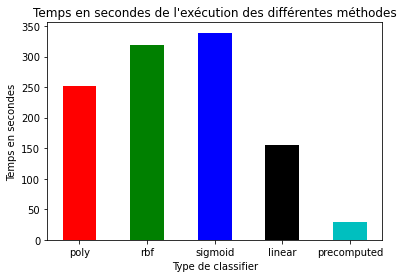

Le temps total d'exécution est de 1092.898938179016 secondes, soit 18.214982302983604 minutes


In [86]:
#  Bar plot
plt.bar(clf_type, time_list, color =['r', 'g', 'b', 'k', 'c'],
        width = 0.5)
plt.xlabel("Type de classifier")
plt.ylabel("Temps en secondes")
plt.title("Temps en secondes de l'exécution des différentes méthodes")
plt.show()

temps_total = sum(time_list)

print(f"Le temps total d'exécution est de {temps_total} secondes, soit {temps_total / 60} minutes")

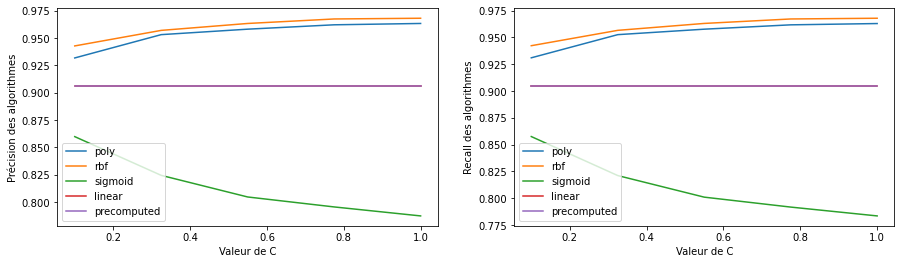

In [87]:
plt.figure(figsize = (15,4))
plt.subplot(1, 2, 1)
for i in range(len(accuracy_list)):
    plt.plot(C_value, accuracy_list[i], label = clf_type[i])
plt.xlabel("Valeur de C")
plt.ylabel("Précision des algorithmes")
plt.legend()

plt.subplot(1, 2, 2)
for i in range(len(recall_list)):
    plt.plot(C_value, recall_list[i], label = clf_type[i])
plt.xlabel("Valeur de C")
plt.ylabel("Recall des algorithmes")
plt.legend()

plt.show()

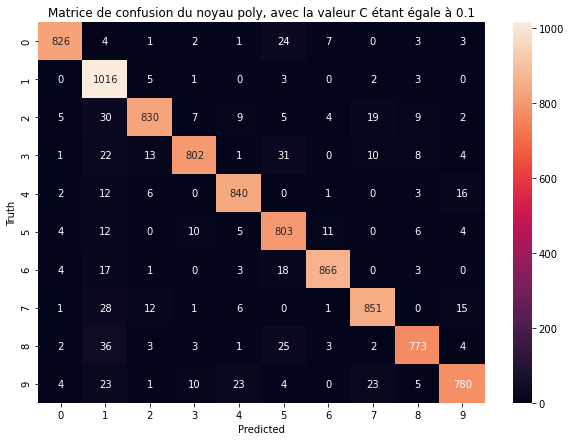

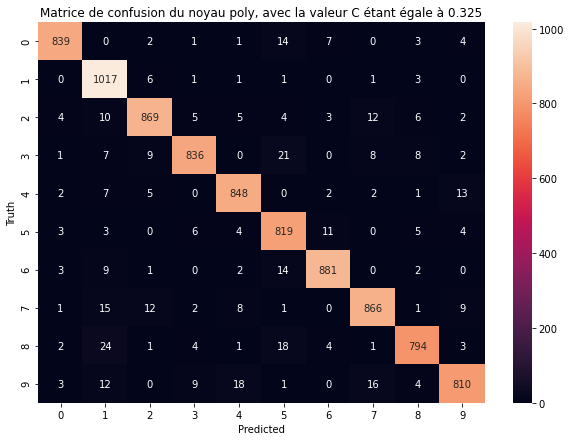

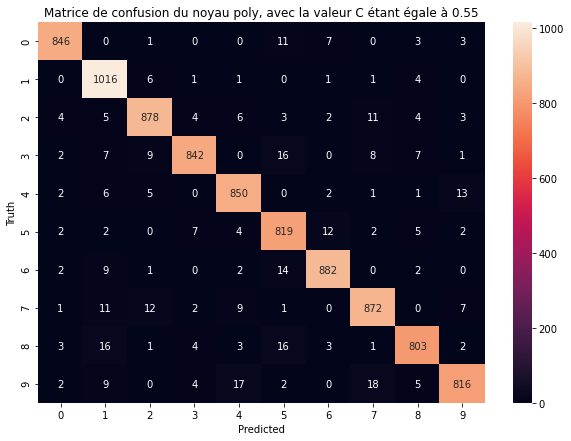

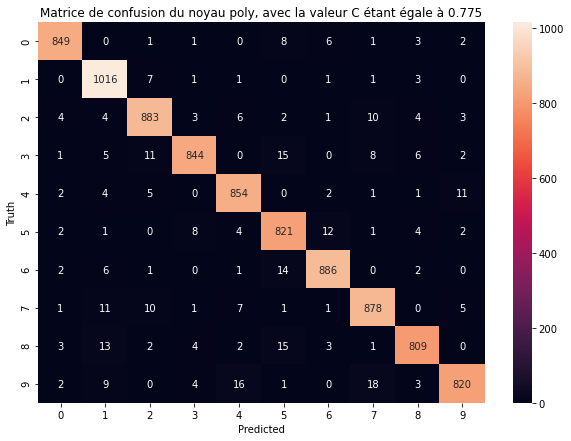

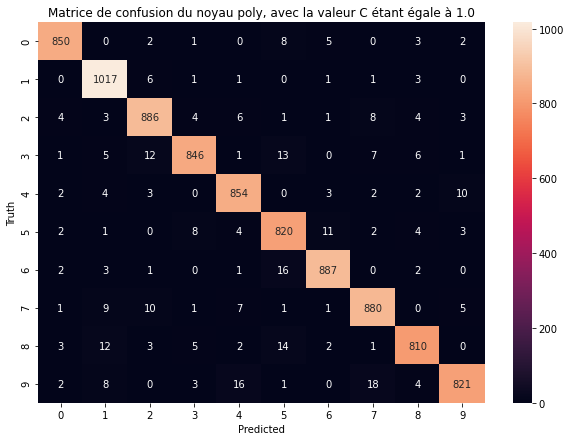

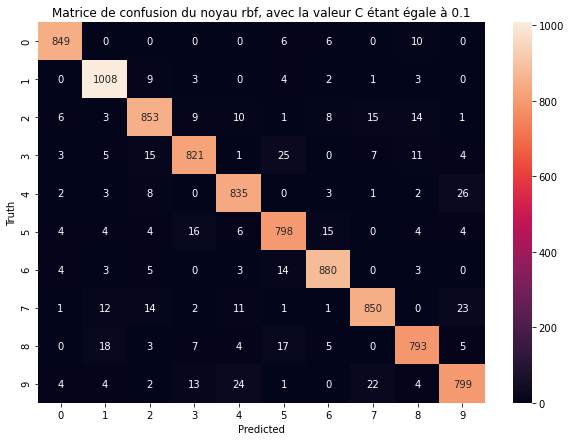

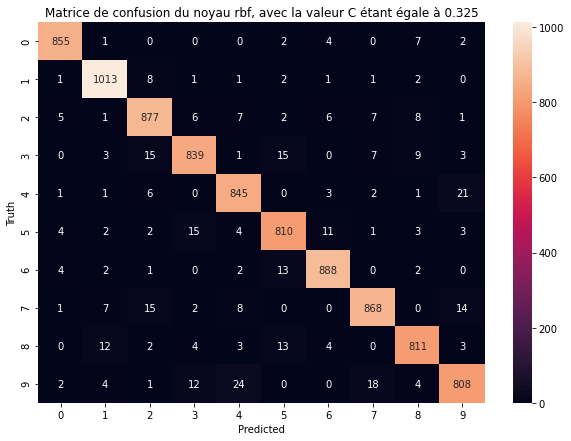

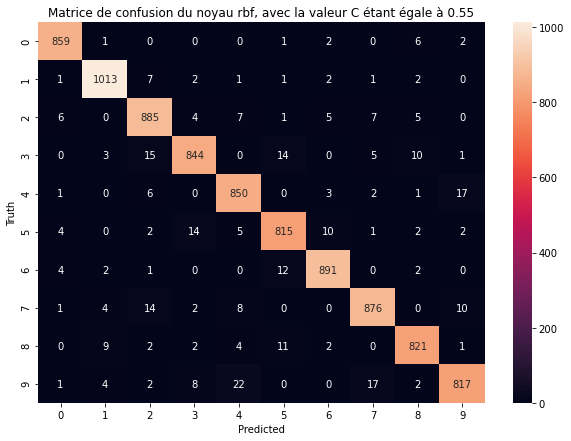

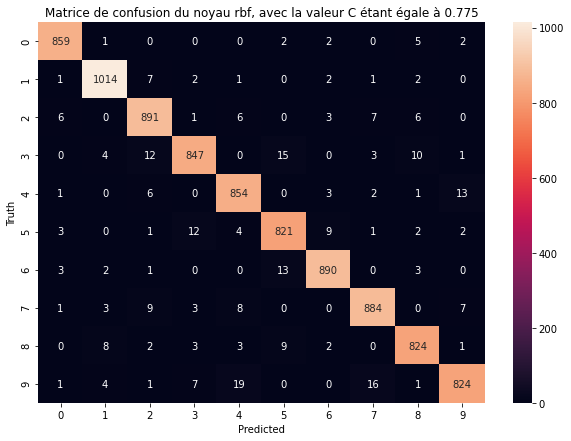

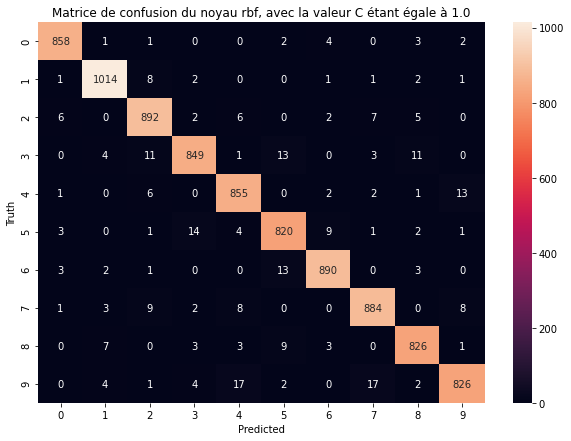

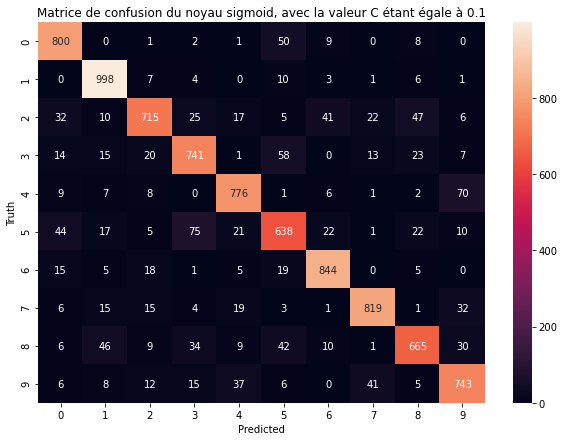

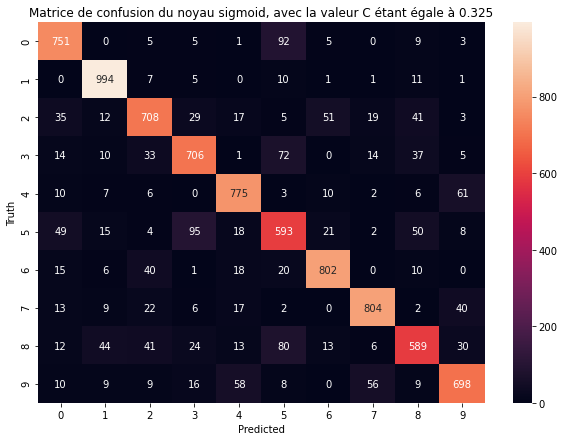

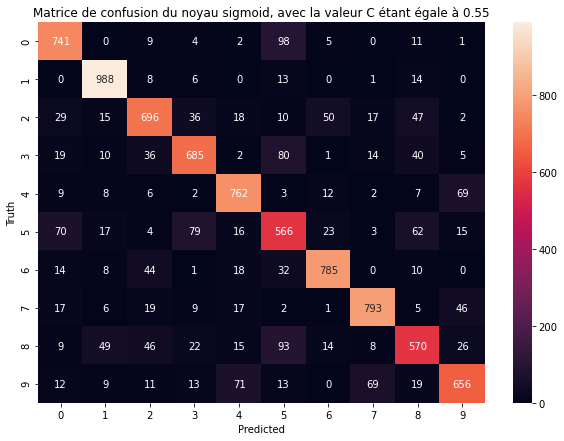

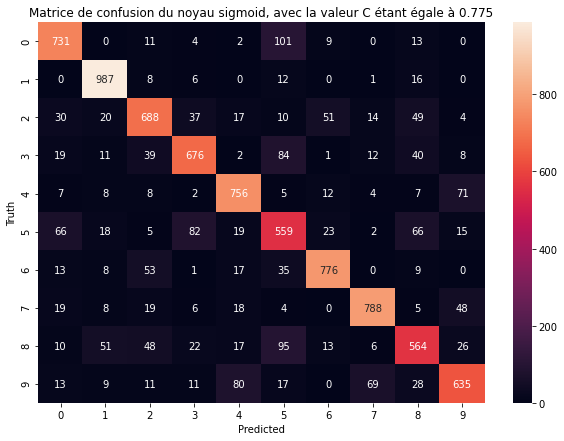

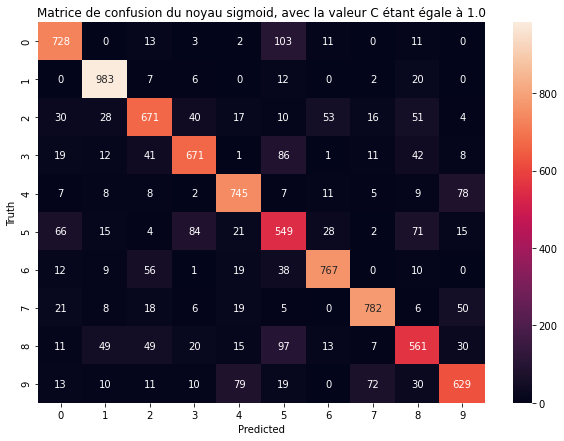

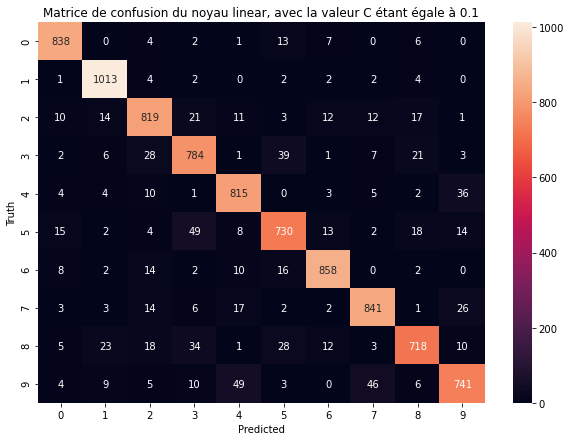

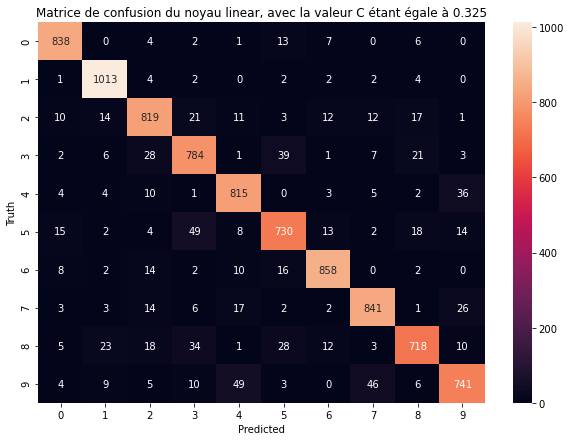

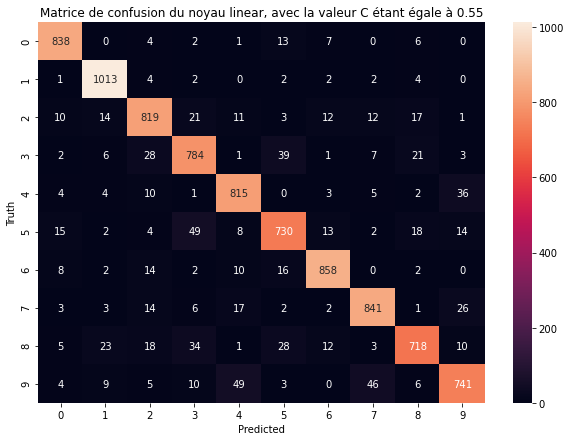

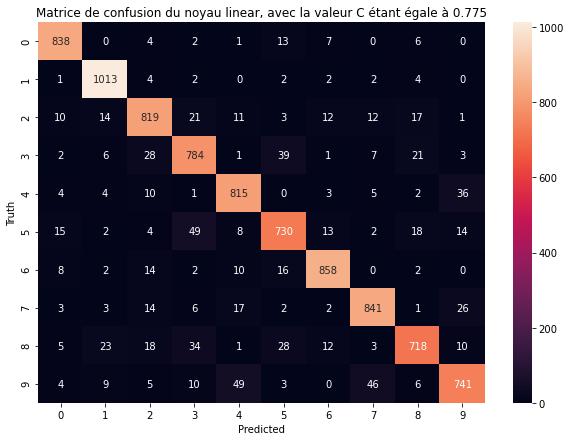

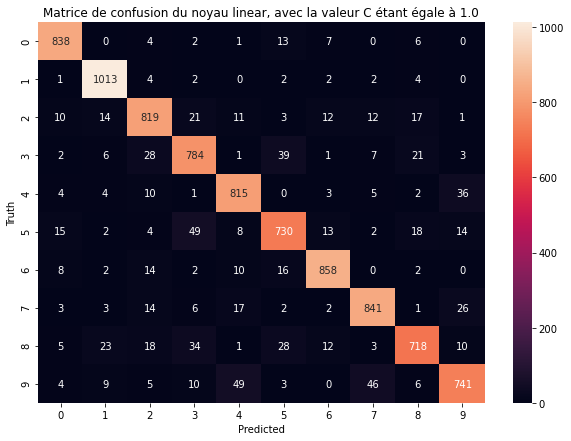

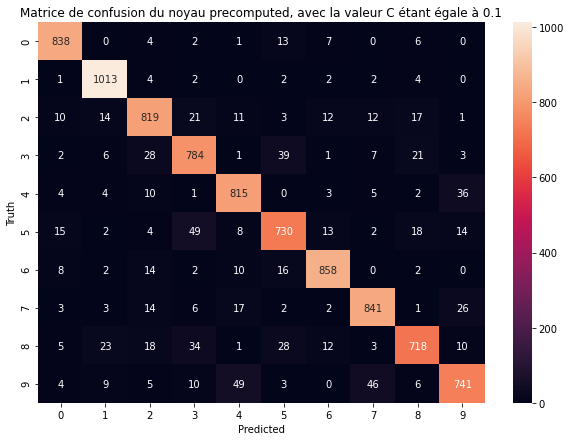

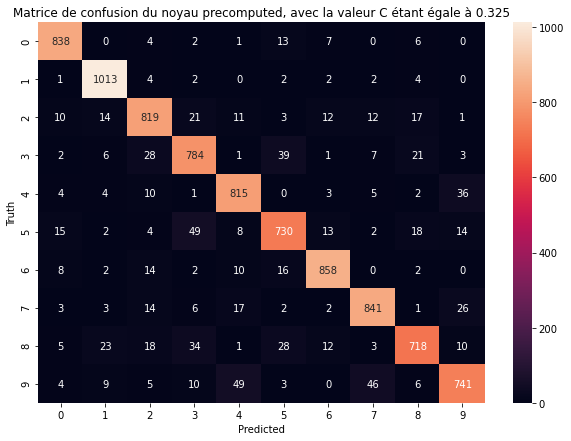

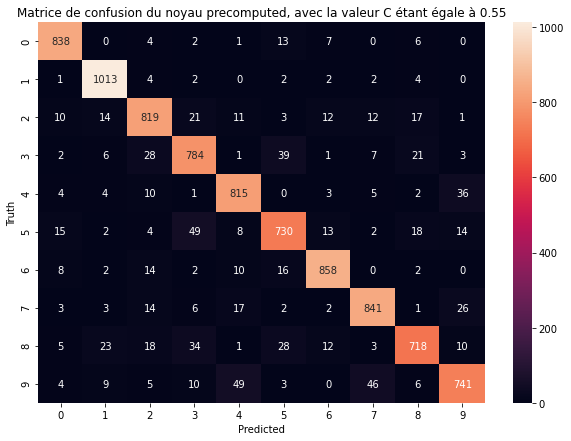

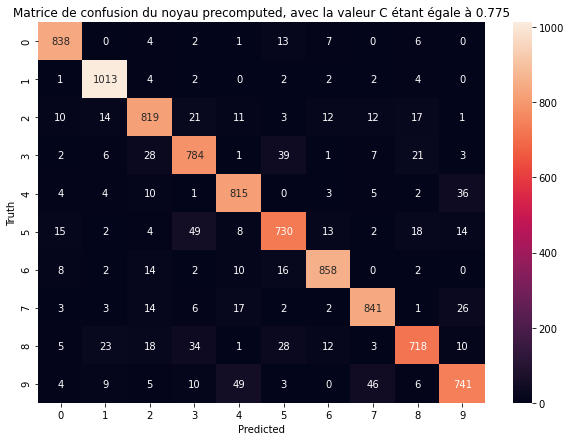

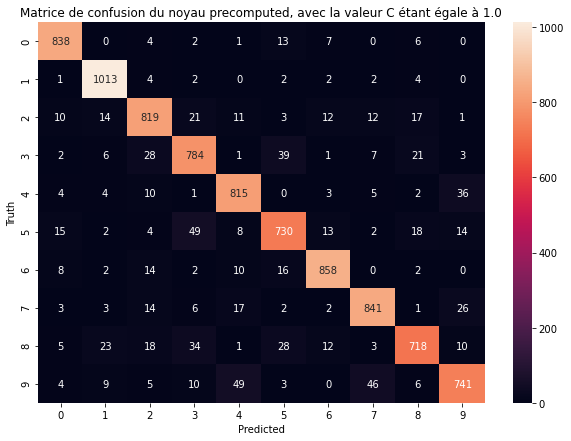

In [88]:
i, j = 0, 0

for submatrix in matrix_list:
    for matrix in submatrix:
        plt.figure(figsize = (10,7))
        sn.heatmap(matrix, annot=True, fmt='d')
        plt.title(f"Matrice de confusion du noyau {clf_type[i]}, avec la valeur C étant égale à {C_value[j]}")
        plt.xlabel('Predicted')
        plt.ylabel('Truth')
        plt.show()
        j+=1
    j=0
    i+=1